# How These Fit Together in Unsupervised Learning:
* Bank Market Segmentation is a classic unsupervised learning problem where you need to group customers based on shared characteristics or behaviors without predefined labels.
* Clustering algorithms (like KMeans) help achieve this by grouping similar customers, allowing the bank to tailor its marketing strategies for each segment.
* Preprocessing (StandardScaler, normalize) is critical to ensure that each feature contributes equally to the clustering process.
* PCA helps in visualizing the clusters and can improve clustering performance by reducing the noise in high-dimensional data.
* Visualization tools (Seaborn, Matplotlib) help interpret the clusters, allowing you to see how the customers have been grouped and understand the patterns in the data.

# import seaborn as sns
* Seaborn is a visualization library built on top of Matplotlib that makes it easier to create informative and attractive statistical graphics. Seaborn will help you create visualizations, such as heatmaps, distribution plots, or pair plots, to explore and understand the bank customer data.
# import matplotlib.pyplot as plt
* Matplotlib is a fundamental plotting library for creating static, interactive, and animated visualizations in Python. Matplotlib works in conjunction with Seaborn to generate plots and graphs. You’ll use it to visualize the results of your segmentation model, such as plotting clusters or PCA components.
  # from sklearn.preprocessing import StandardScaler, normalize
* StandardScaler and normalize are preprocessing tools from Scikit-learn, a popular machine learning library. In clustering (e.g., KMeans), if one feature has a larger range than others, it can dominate the clustering process. Therefore, scaling and normalizing the data is a critical preprocessing step to ensure all features contribute equally.
* StandardScaler: Scales features by removing the mean and scaling to unit variance. This is important because many machine learning algorithms are sensitive to the scale of the input data.
* normalize: This function normalizes data by adjusting its values such that they fall within a particular range, which ensures that the features are comparable in terms of scale.
# from sklearn.cluster import KMeans
* KMeans is a clustering algorithm used for unsupervised learning. It partitions the dataset into k distinct, non-overlapping clusters based on feature similarity. You’ll use the KMeans algorithm to perform segmentation on the bank customer data. KMeans will assign each customer to a cluster, where customers in the same cluster are more similar to each other based on their financial behaviors or characteristics.
# from sklearn.decomposition import PCA
* PCA (Principal Component Analysis) is a dimensionality reduction technique. PCA is often used before clustering to reduce the number of features while retaining the most important information. This is especially useful when working with high-dimensional data. Reducing dimensionality can improve the performance and interpretability of clustering algorithms like KMeans by eliminating noise and focusing on the most important underlying patterns in the data.

# IMPORT LIBRARIES AND DATASETS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
file_path_data = r'D:\01\Python Programming Fundamentals and Practical Applications in Finance\4. Marketing_data.csv'
creditcard_df = pd.read_csv(file_path_data )
creditcard_df.head()

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()
# 18 features with 8950 points 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# Let's see who made one off purchase of $40761!
# creditcard_df['ONEOFF_PURCHASES'] selects the 'ONEOFF_PURCHASES' column from the DataFrame.
# creditcard_df['ONEOFF_PURCHASES'] == 40761.25 creates a Boolean mask, where each value in the 'ONEOFF_PURCHASES' column is checked to see if it equals 40761.25
# creditcard_df[...]: The DataFrame is then indexed with the Boolean mask created in the previous step. 
# This means that only the rows where the value in the 'ONEOFF_PURCHASES' column is exactly 40761.25 will be selected.
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZE AND EXPLORE DATASET

<Axes: >

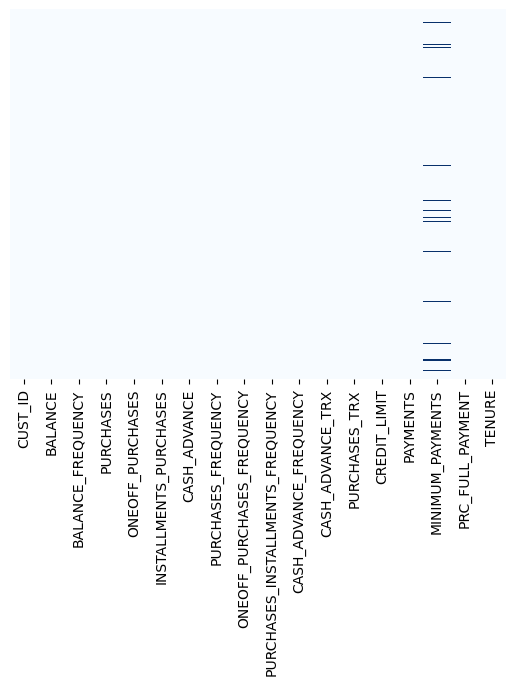

In [10]:
# Let's see if we have any missing data, luckily we don't!
# creditcard_df.isnull() creates a matrix of Boolean values, where True represents a missing value in the DataFrame.
# Seaborn's heatmap function is used to plot heatmaps, where each cell in the heatmap represents the value of the corresponding element in the DataFrame.
# In this case, the heatmap will visualize whether a value is NaN or not.
# yticklabels=False disables the y-axis tick labels (row labels). This is usually done to reduce clutter in the visualization, especially when there are many rows.
# cbar=False removes the color bar (legend) that is usually displayed on the side of a heatmap, indicating what the colors represent. 
# Since this heatmap only represents missing values (binary: missing or not missing), the color bar is not necessary.
# cmap='Blues' sets the color palette for the heatmap to the "Blues" color map. 
# In the heatmap, different shades of blue will indicate the presence of missing data. Darker shades of blue might indicate the presence of NaN values.
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Once you know where the missing data is:
* Imputation: Fill missing values with the mean, median, or a value like 0 if appropriate.
* Dropping: Drop columns or rows with excessive missing values.
* Flagging: Add binary flags for missing data to preserve the information that data was missing.

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Why the mean?: 
* Imputing with the mean is a simple and effective technique, especially when the distribution of the data is roughly normal. This approach ensures that the overall central tendency of the data is maintained.

In [12]:
# creditcard_df.loc[(...), 'MINIMUM_PAYMENTS']
# .loc[]: This is a Pandas method used to access rows and columns by labels or a Boolean condition.
# Here, .loc[] is used to select rows in creditcard_df where the condition inside () (missing values in 'MINIMUM_PAYMENTS') is True.
# 'MINIMUM_PAYMENTS' specifies the column in which you want to update the values.
# The mean value will be used to fill in the missing values for the 'MINIMUM_PAYMENTS' column.
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

# Advanced Techniques:
While imputing with the mean is a common method, more advanced techniques include:
* Median Imputation: Useful when the data has outliers.
* K-Nearest Neighbors Imputation: Estimates missing values based on the values of similar rows (neighbors).
* Regression Imputation: Uses regression models to predict missing values based on other features in the dataset.

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

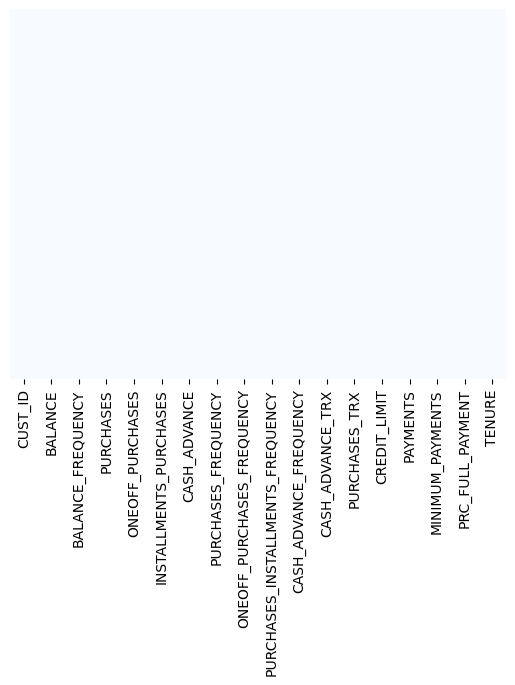

In [15]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

# Why this operation?
* Data Quality Check:  Duplicate data can bias the results of machine learning models, especially unsupervised models like clustering (e.g., KMeans), by giving undue weight to certain data points. Duplicates are typically removed to ensure that each data point (customer) contributes equally to the model.
* Preprocessing: After identifying the number of duplicates, the next step is often to remove these duplicate rows using the drop_duplicates() method. This ensures that the model operates on unique data points, improving its accuracy and fairness. ——> creditcard_df.drop_duplicates(inplace=True)

* Clustering and Unsupervised Learning: In KMeans clustering, duplicated rows can cause clusters to form inaccurately, as duplicate data points can overly influence the centroid of a cluster. Removing duplicates ensures that each data point has an equal impact on the clustering process.

In [16]:
# Let's see if we have duplicated entries in the data
# Check for duplicate rows in the creditcard_df DataFrame and returns the total number of duplicates.
# duplicated() is a Pandas function that returns a Boolean Series where:True indicates that the row is a duplicate. False indicates that the row is unique.
creditcard_df.duplicated().sum()

0

# Why this operation?
* The 'CUST_ID' column contains a unique identifier for each customer, but it doesn't carry any meaningful information for clustering or segmentation. Clustering algorithms like KMeans require behavioral or transactional data to group customers, not their unique identifiers.
* Dropping 'CUST_ID' ensures that the model focuses on the actual customer features (e.g., purchases, payments, balance) rather than a meaningless column.

In [17]:
# Let's drop Customer ID since it has no meaning here
# axis=0: Refers to rows. axis=1: Refers to columns.
# nplace=True means that the DataFrame is modified in place, i.e., the operation is performed directly on creditcard_df without needing to assign the result to a new DataFrame.
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
# creditcard_df.columns provides the names of all the columns in the creditcard_df DataFrame.
# The len() function calculates the number of elements in the object passed to it.
n = len(creditcard_df.columns)
n

17

In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15092\3487302241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
D:\Programms\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15092\3487302241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

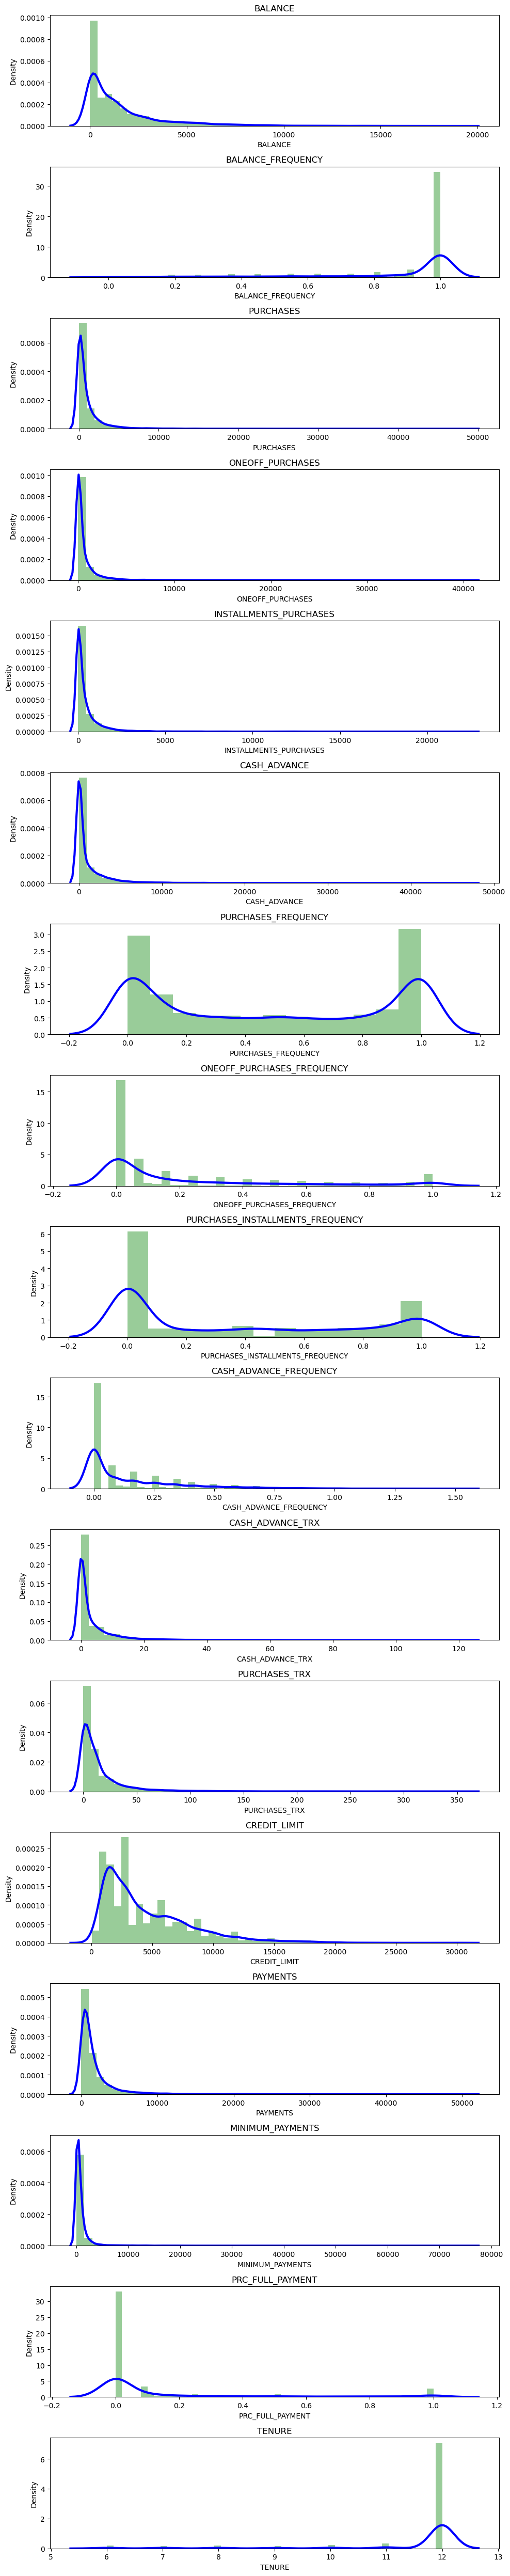

In [21]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

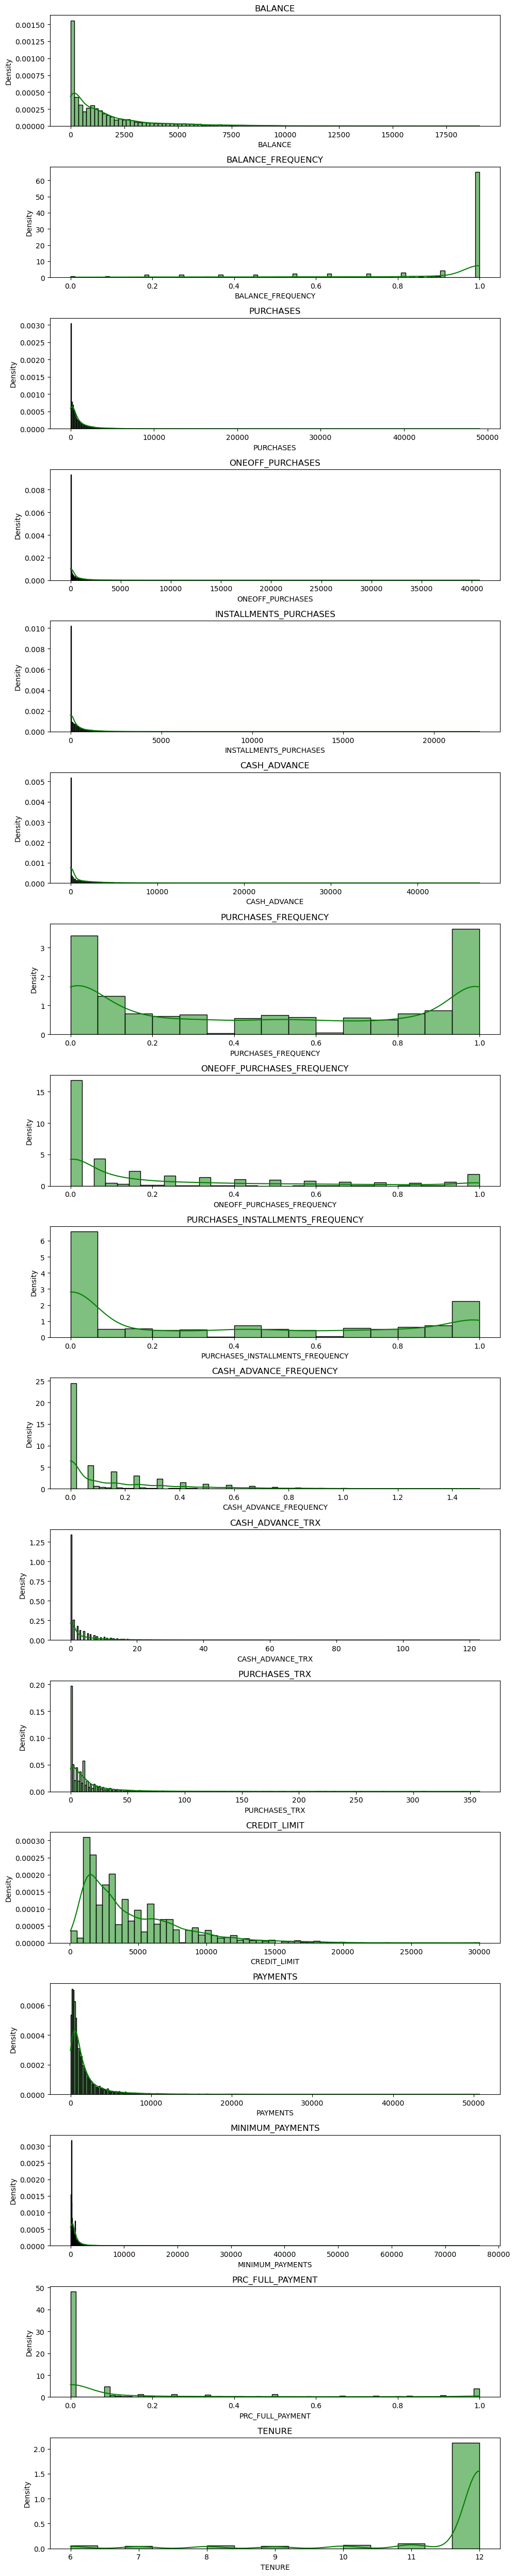

In [40]:

# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

# warnings: This module provides a way to manage warnings that occur in the code. 
# Here, it is used to suppress any future warnings related to Pandas, such as FutureWarning messages that may arise due to upcoming changes in the library.
import warnings  # Import warnings to suppress the FutureWarning

# Suppress the FutureWarning about use_inf_as_na (optional)
# Such warnings usually indicate that certain functionalities in Pandas might change in future versions, but they do not affect the current functionality.
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10, 50)) # initialize a new figure in Matplotlib, and set the size of the figure to be 10 units wide and 50 units high. 
for i in range(len(creditcard_df.columns)):
  # This creates a subplot for each column, and there will be 17 subplots in total (based on the number of columns).
  plt.subplot(17, 1, i + 1) # 17: Number of rows in the grid; 1: Number of columns in the grid; i + 1: The position of the subplot (starting from 1).
    
  # Create a histogram (and optionally a KDE plot) for a given dataset.
  sns.histplot(
      creditcard_df[creditcard_df.columns[i]], # Select the i-th column of the DataFrame.
      kde=True,  # Add KDE plot, which smooths the histogram into a continuous probability density function.
      color="g",  # Set histogram color
      stat="density",  # Normalizes the histogram so that the area under the histogram sums to 1. This makes it comparable to the KDE plot.
      linewidth=1,  # Set line width for KDE
      label="KDE",  # Label for KDE
  )
  plt.title(creditcard_df.columns[i]) # Set the title of each subplot to the name of the column being plotted.

plt.tight_layout() # Automatically adjusts the spacing between subplots to ensure that they do not overlap and are neatly displayed.

In [41]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

# Why is it important?:
* Feature Selection: The correlation matrix helps identify highly correlated features, which may be redundant. For example, if two features are highly correlated (near +1 or -1), one of them could potentially be dropped to reduce dimensionality without losing much information.
* Data Understanding: In financial datasets, correlations between features like purchases, balance, and payments can provide insight into customer behavior. For instance, if cash advances are highly correlated with one-off purchases, this may suggest that customers tend to take cash advances to make one-time large purchases.

In [80]:
correlations = creditcard_df.corr() # Calculate the correlation matrix for all the numerical columns in the creditcard_df DataFrame

<Axes: >

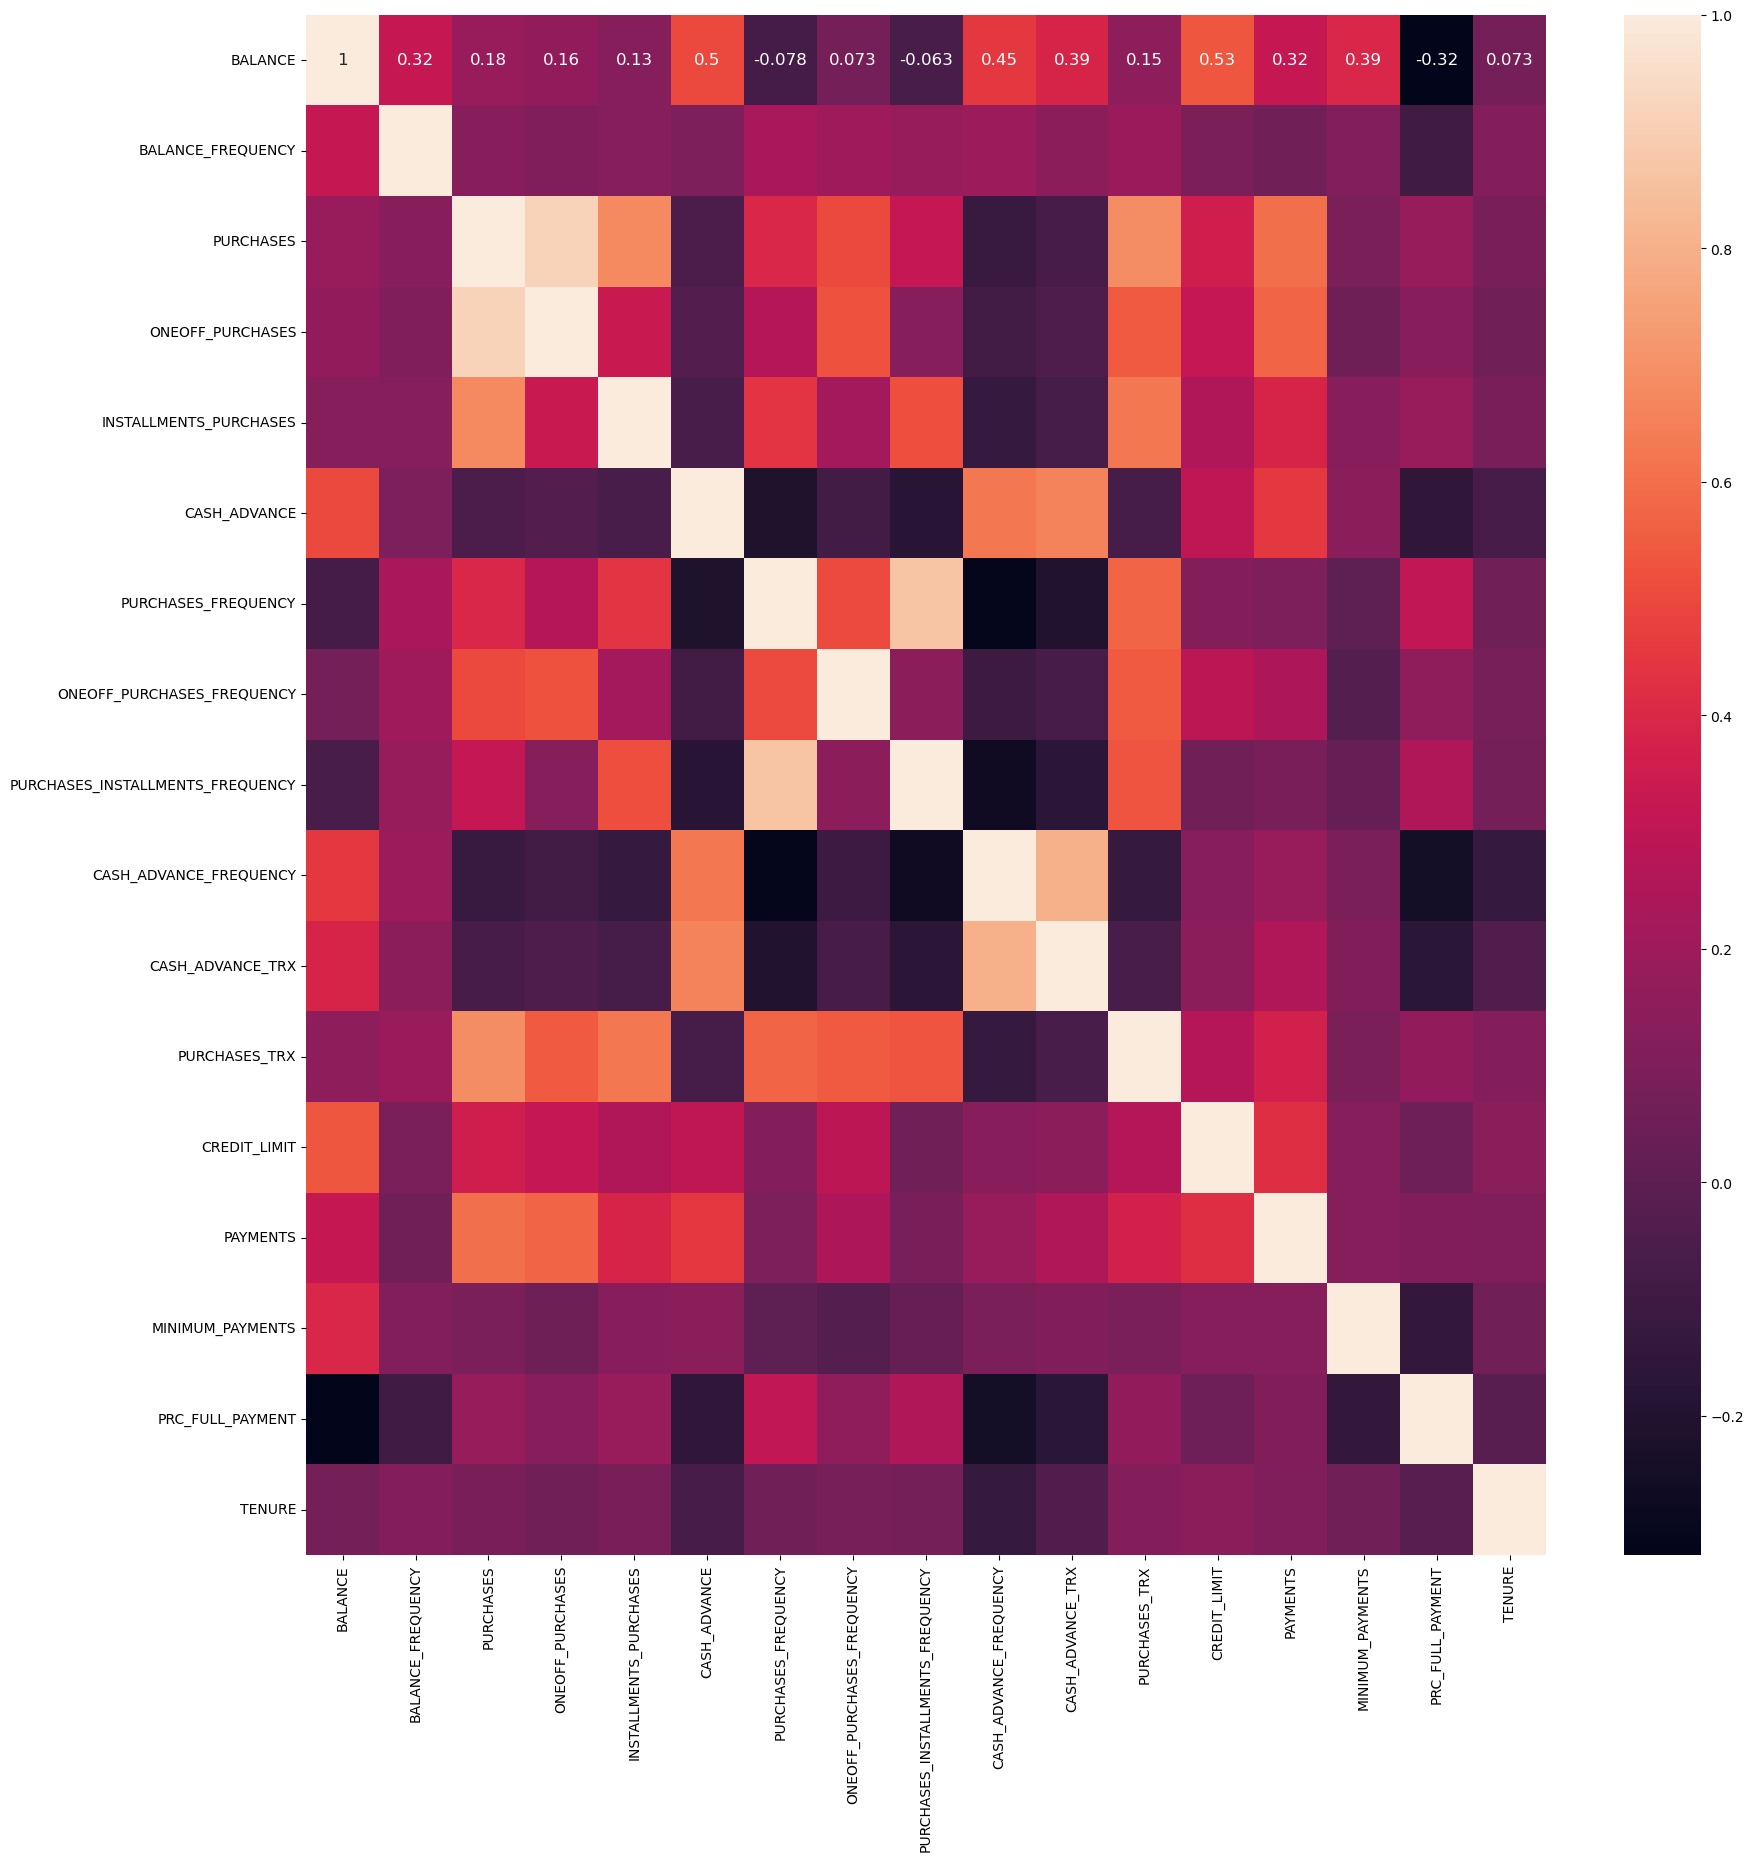

In [81]:
# plt.subplots(figsize=(20, 20)): creates a figure and axis object with a large size of 20x20 units,
f, ax = plt.subplots(figsize = (20, 20))

# The Seaborn heatmap() function is used to visualize the correlation matrix as a heatmap.
# annot=True: Adds the actual correlation values to each cell in the heatmap. 
# fontsize=12: Sets the size of the font for the correlation numbers inside each cell.
# ha="center", va="center": Horizontally (ha) and vertically (va) aligns the annotation text to the center of each cell.
sns.heatmap(correlations, annot = True, annot_kws={"fontsize": 12, "ha": "center", "va": "center"})

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

## Why scale?: 
Features with larger ranges can dominate distance calculations in KMeans, skewing the results. Scaling ensures that all features contribute equally.

In [44]:
# Let's scale the data first
# StandardScaler(): This is used to standardize the features by removing the mean and scaling to unit variance. 
# This is essential because clustering algorithms like KMeans are sensitive to the scale of the data.
scaler = StandardScaler() # Standardize the features by removing the mean and scaling to unit variance.

# fit_transform(): First, it computes the mean and standard deviation for each feature, then applies the transformation (standardization) to the data.
# The result, creditcard_df_scaled, is a scaled version of the original DataFrame, where each feature has mean 0 and variance 1.
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [45]:
creditcard_df_scaled.shape

(8950, 17)

In [46]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Why this operation?
* The purpose of this code is to use the Elbow Method to find the optimal number of clusters for the KMeans algorithm.
* The Elbow Method looks at the sum of squared distances (inertia) between data points and their assigned cluster center. As the number of clusters increases, the inertia decreases because the clusters fit the data better.
* Elbow Point: The point where the inertia starts decreasing slowly (forming an "elbow" shape) is considered the optimal number of clusters. Adding more clusters beyond this point only minimally improves the clustering.
* Customer Segmentation: In bank market segmentation, the goal is to group customers into clusters based on their financial behavior. Determining the optimal number of clusters helps ensure that you group customers in a meaningful wa

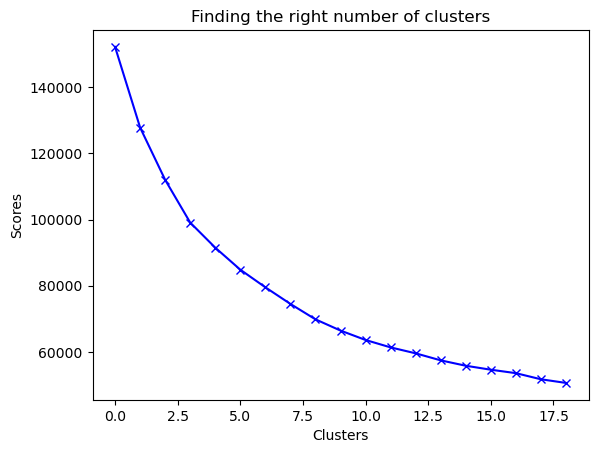

In [47]:
# This list will hold the inertia (sum of squared distances from each point to its assigned cluster center) for different numbers of clusters.
# These scores will be used to plot the Elbow Method graph, which helps in selecting the optimal number of clusters.
scores_1 = []

# This range allows you to test different numbers of clusters and find the optimal one by comparing their inertia values.
range_values = range(1, 20)

# The loop will fit KMeans with 1 to 19 clusters and store the inertia (the measure of how well the clusters fit the data) for each number of clusters.
for i in range_values:
    # Initializes the KMeans algorithm with i clusters in each iteration. 
    kmeans = KMeans(n_clusters = i) # The n_clusters parameter defines how many clusters KMeans should form.
    
    # KMeans tries to partition the data into i clusters by minimizing the sum of squared distances between data points and their assigned cluster centers.
    kmeans.fit(creditcard_df_scaled) # Fits the KMeans algorithm to the scaled credit card data. 

    # The inertia is a measure of how internally cohesive the clusters are. 
    # Specifically, it is the sum of squared distances from each data point to the center of its assigned cluster. 
    # Lower inertia means better clustering (for a fixed number of clusters).
    scores_1.append(kmeans.inertia_)
    
# Plots the inertia scores (scores_1) for each value of i (number of clusters).
plt.plot(scores_1, 'bx-') # The 'bx-' argument specifies blue-colored points connected by lines.

plt.title('Finding the right number of clusters')
plt.xlabel('Clusters') # This represents the number of clusters being tested
plt.ylabel('Scores') # This represents the inertia values for the clusters

plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

#  APPLY K-MEANS METHOD

In [48]:
kmeans = KMeans(8) # Initialize the KMeans algorithm with 8 clusters.

# During the fitting process, the KMeans algorithm assigns each data point to 1 of the 8 clusters by minimizing the distance between the data points & the cluster centers.
# This step essentially runs the KMeans clustering algorithm, assigns cluster labels to each data point, and computes the cluster centers (the mean of data points within each cluster).
kmeans.fit(creditcard_df_scaled) # Fits the KMeans algorithm to the scaled dataset creditcard_df_scaled.

# This attribute returns an array of integers where each value represents the cluster assignment for the corresponding data point in the dataset.
labels = kmeans.labels_

In [49]:
kmeans.cluster_centers_.shape

(8, 17)

In [50]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.164580,0.391961,0.453684,0.593385,-0.017578,-0.332646,0.943032,1.877299,0.089435,-0.406390,-0.322314,0.524293,0.375460,0.087458,-0.162492,0.405496,0.261138
1,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.568620,-0.392680,-0.209145,0.014011,-3.203733
2,1.689948,0.396143,-0.218924,-0.157453,-0.228441,2.017284,-0.478708,-0.214924,-0.414713,1.922067,1.937125,-0.267579,1.026054,0.808131,0.555558,-0.395159,0.070229
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044006,8.098975,1.120318,1.110132,0.310863
4,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175842,-0.192408,-0.256478,0.283762,0.199336
5,-0.364330,0.333247,-0.036790,-0.244128,0.361328,-0.363466,0.992591,-0.386638,1.207905,-0.475047,-0.360997,0.188556,-0.261047,-0.216287,-0.032181,0.315518,0.257433
6,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238990,1.290295,0.441655,0.304778,0.334182
7,0.016978,0.403704,-0.361492,-0.246785,-0.401243,-0.091152,-0.865325,-0.410225,-0.756684,0.109397,-0.025198,-0.486239,-0.305233,-0.249583,-0.009662,-0.457045,0.272736


In [51]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [52]:
labels.shape # Labels associated to each data point

(8950,)

In [53]:
labels.min()

0

In [54]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 6, 0, ..., 2, 2, 2])

In [55]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


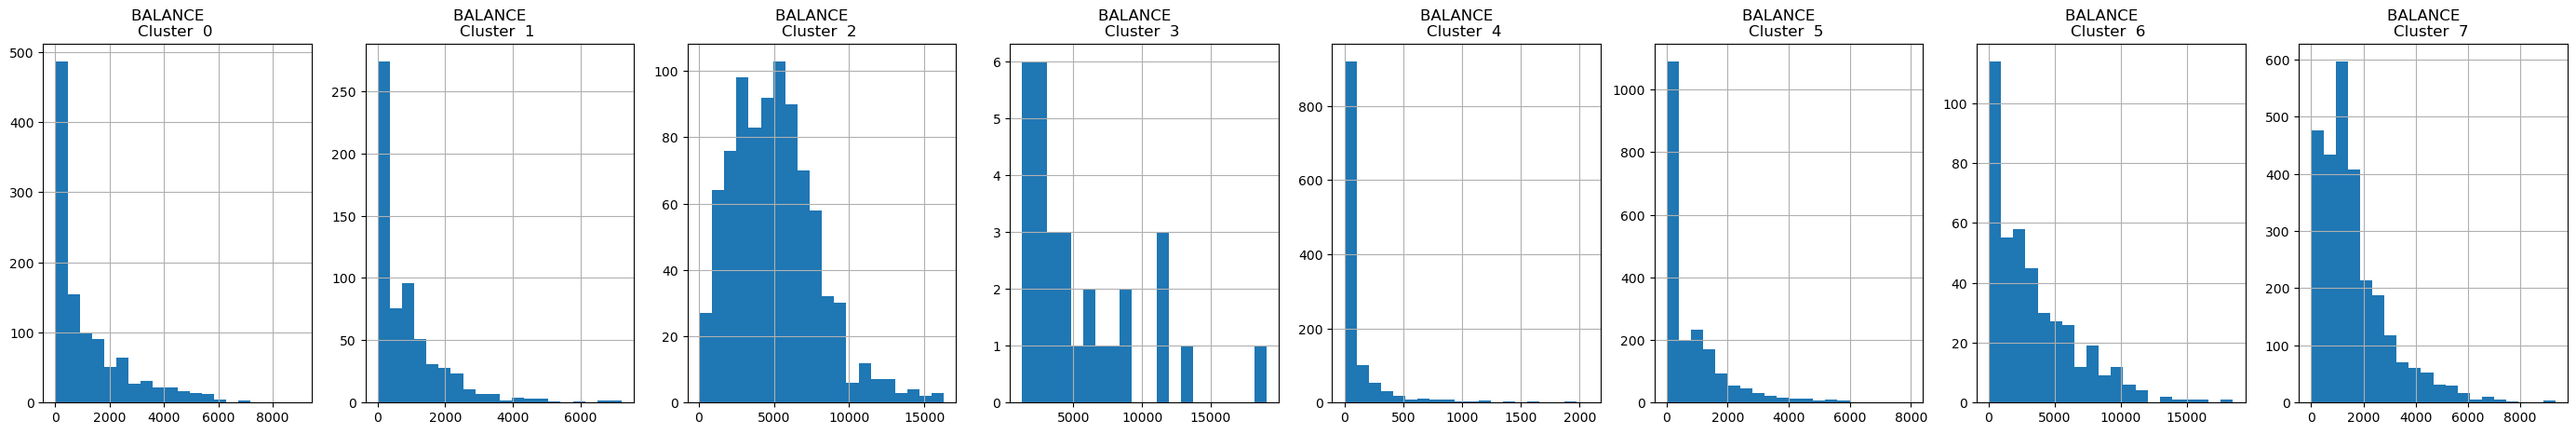

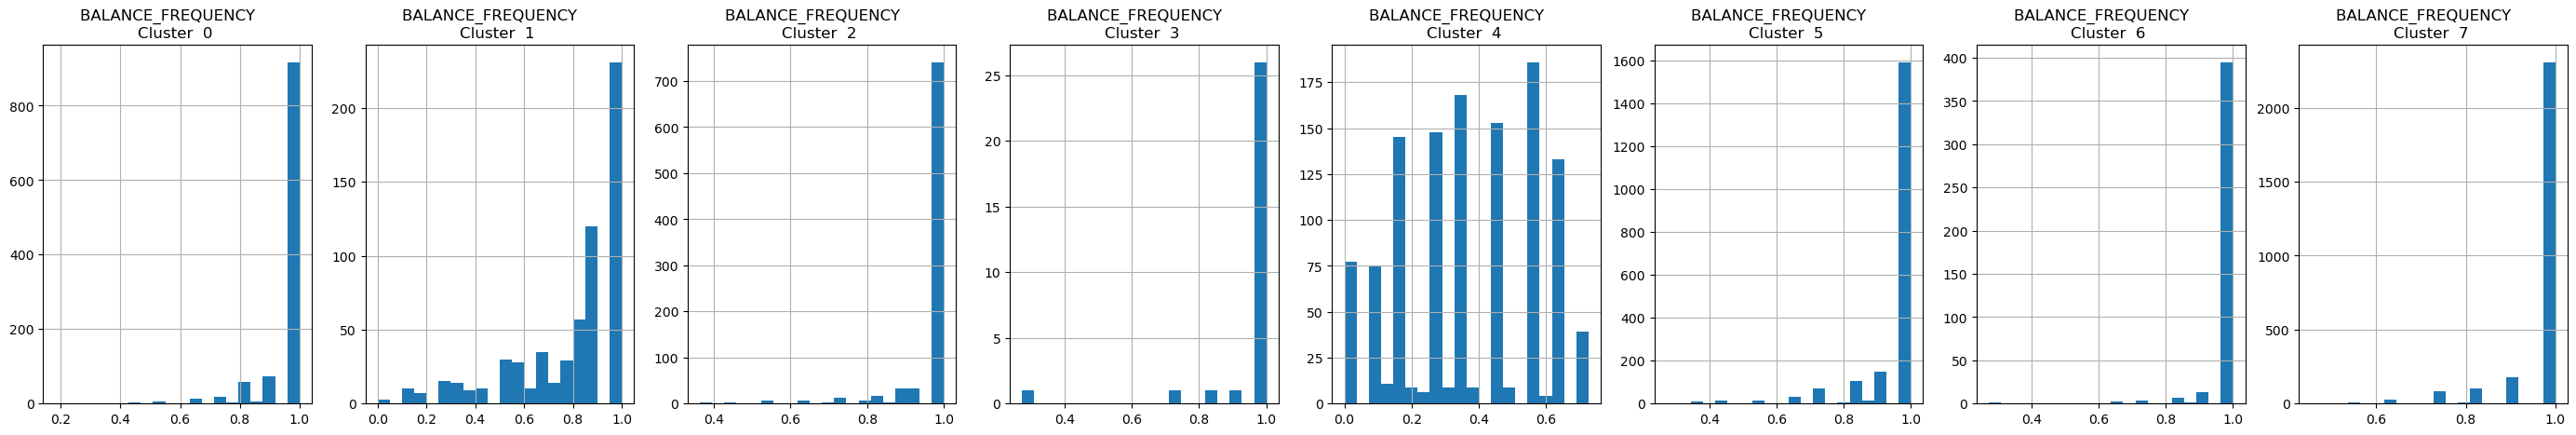

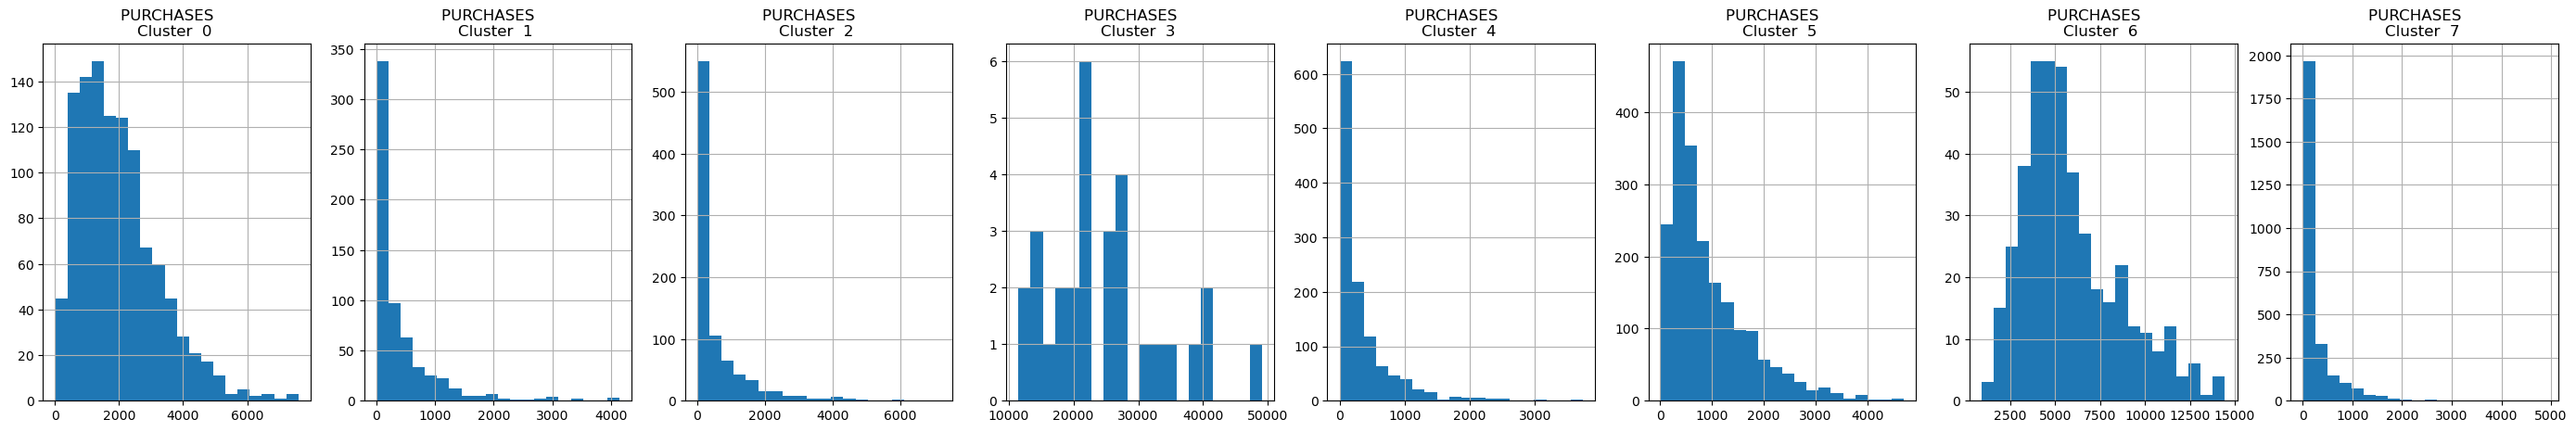

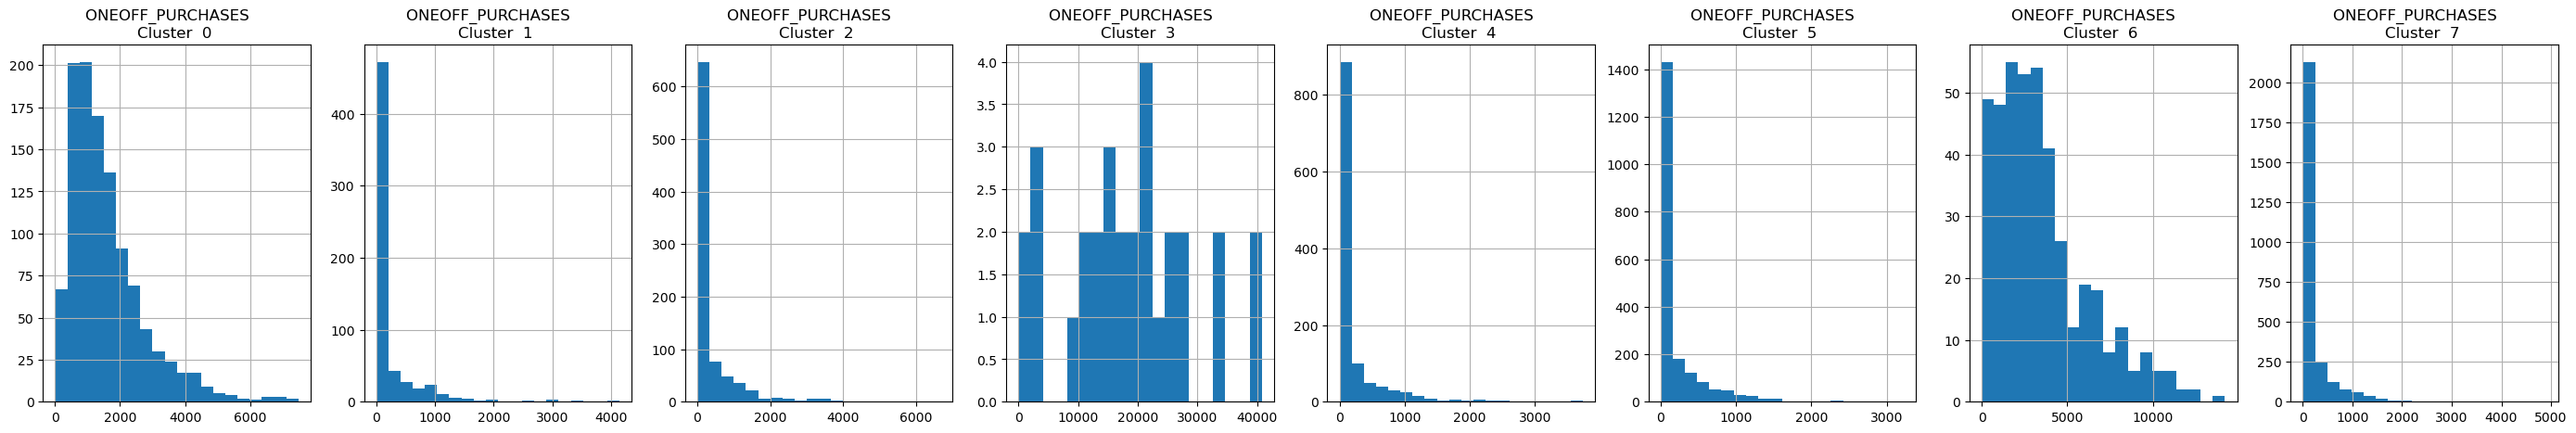

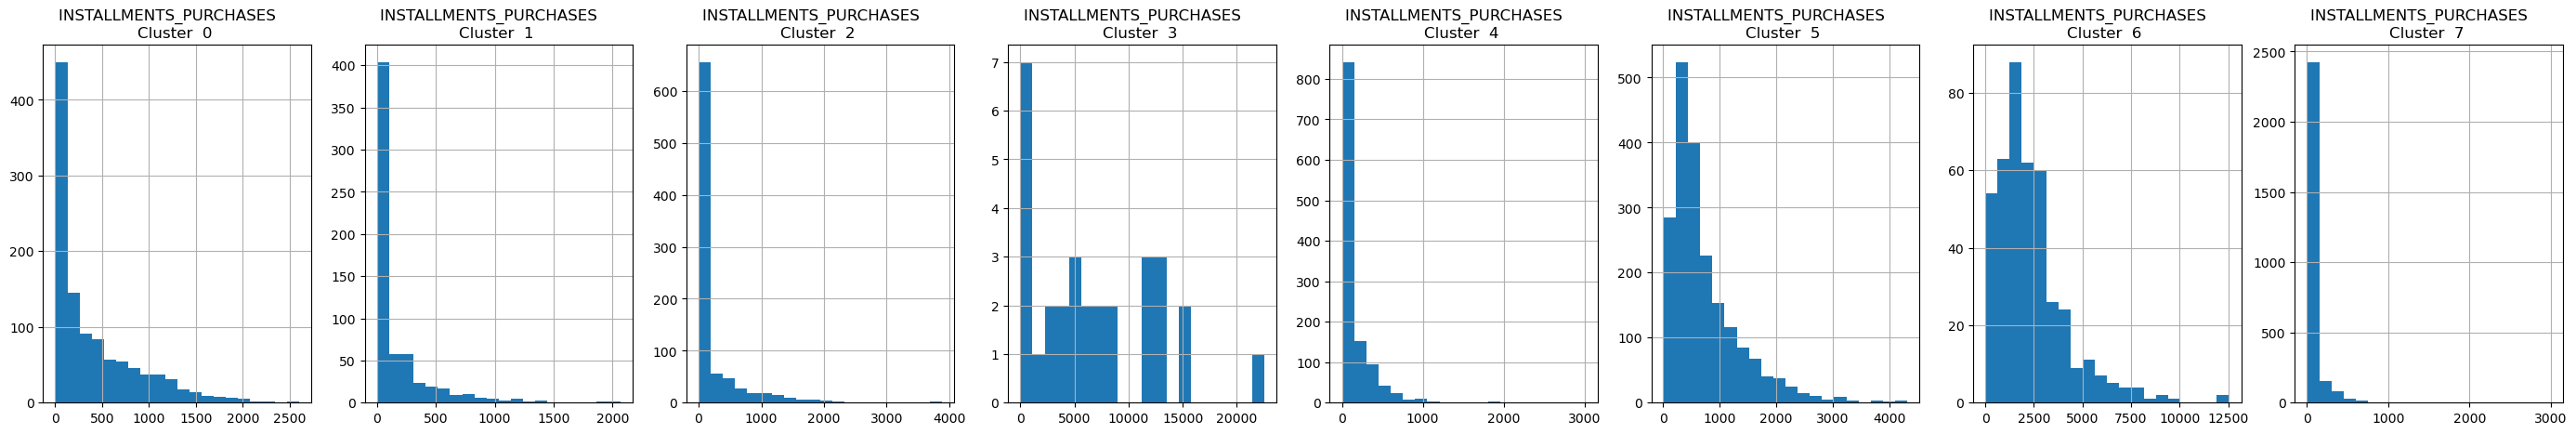

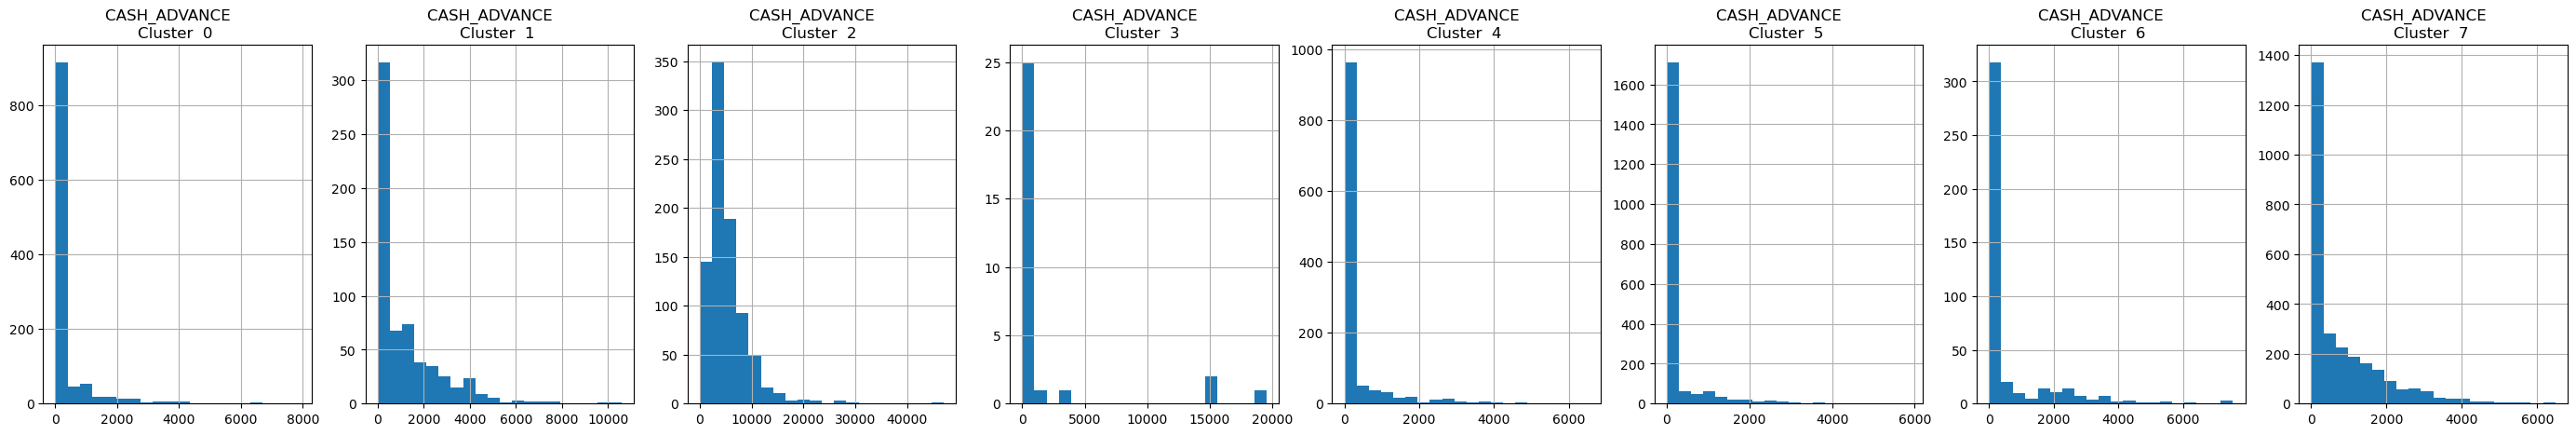

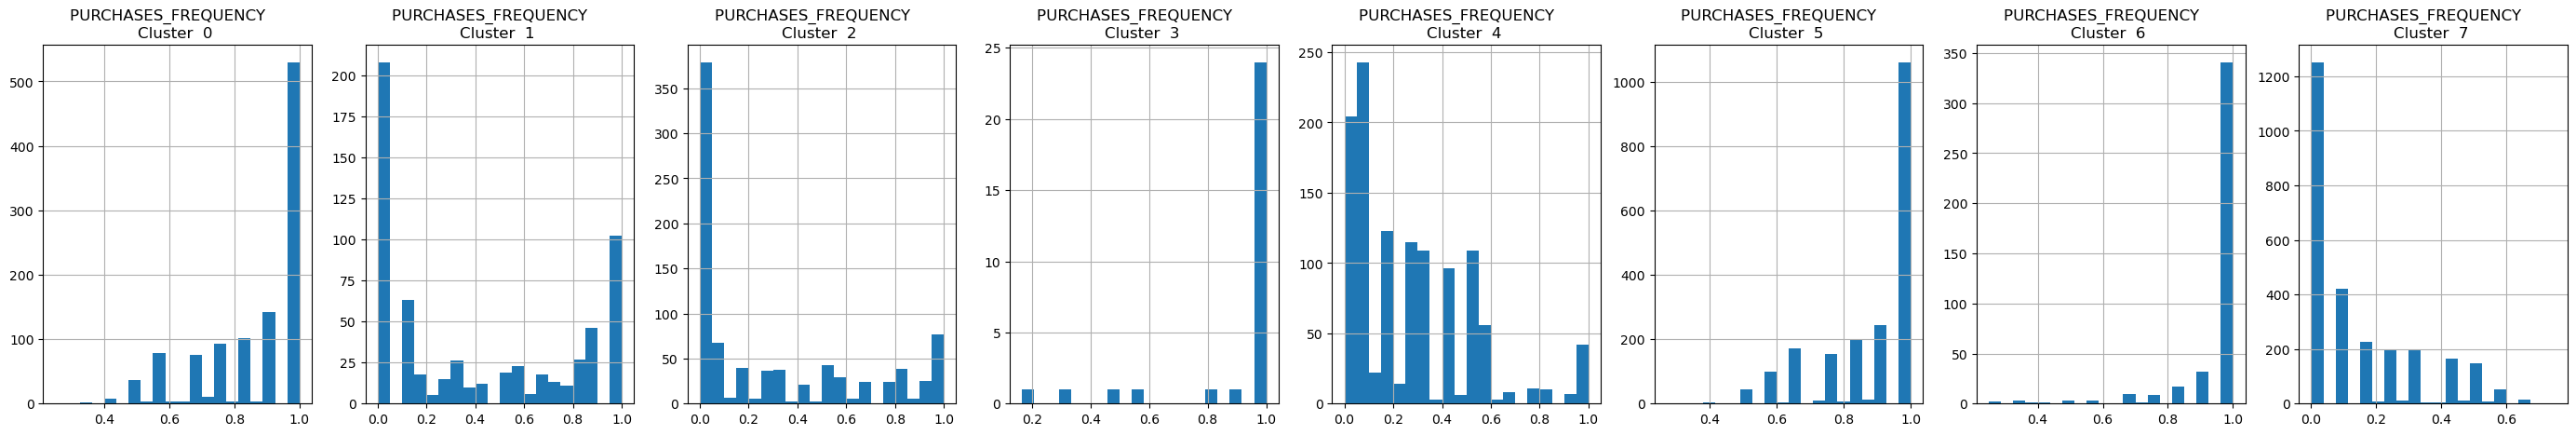

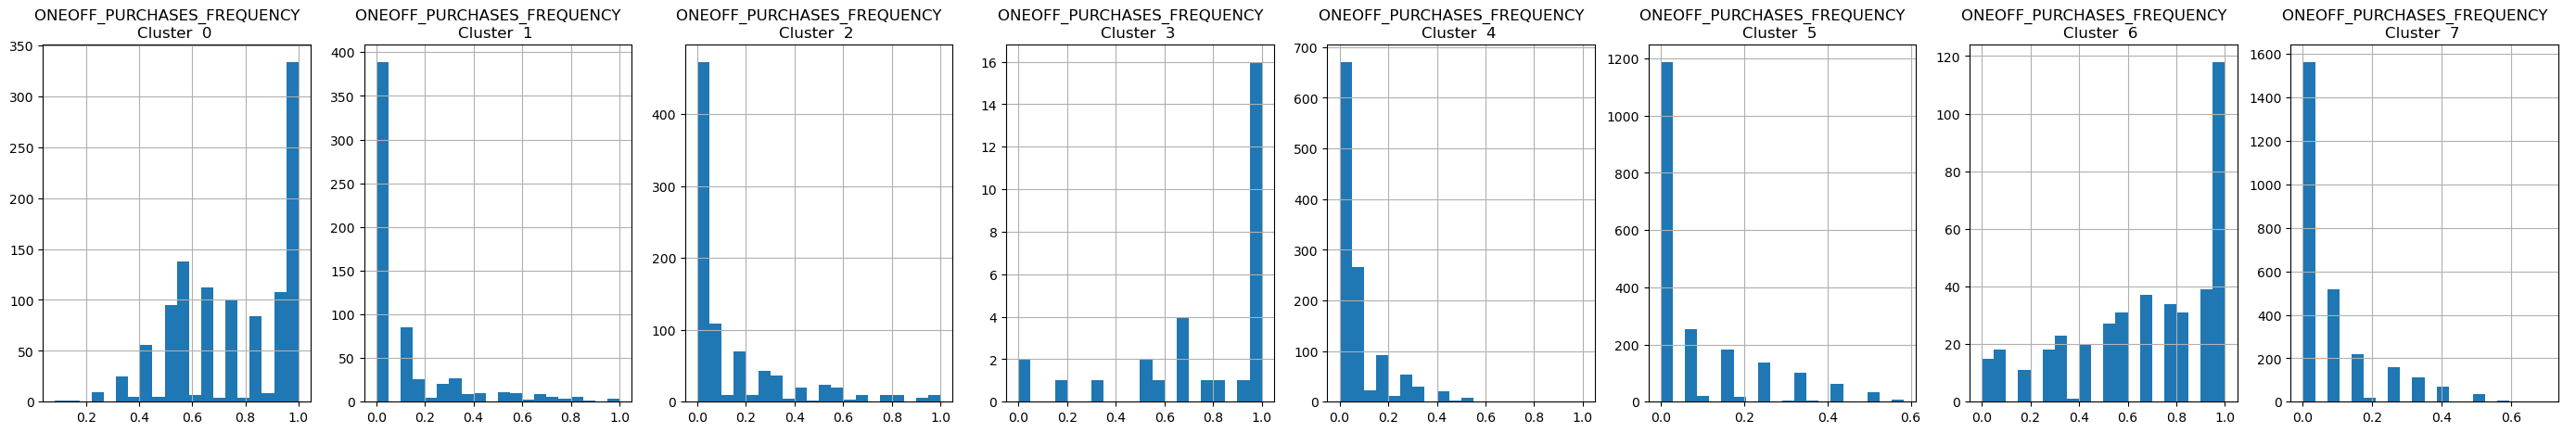

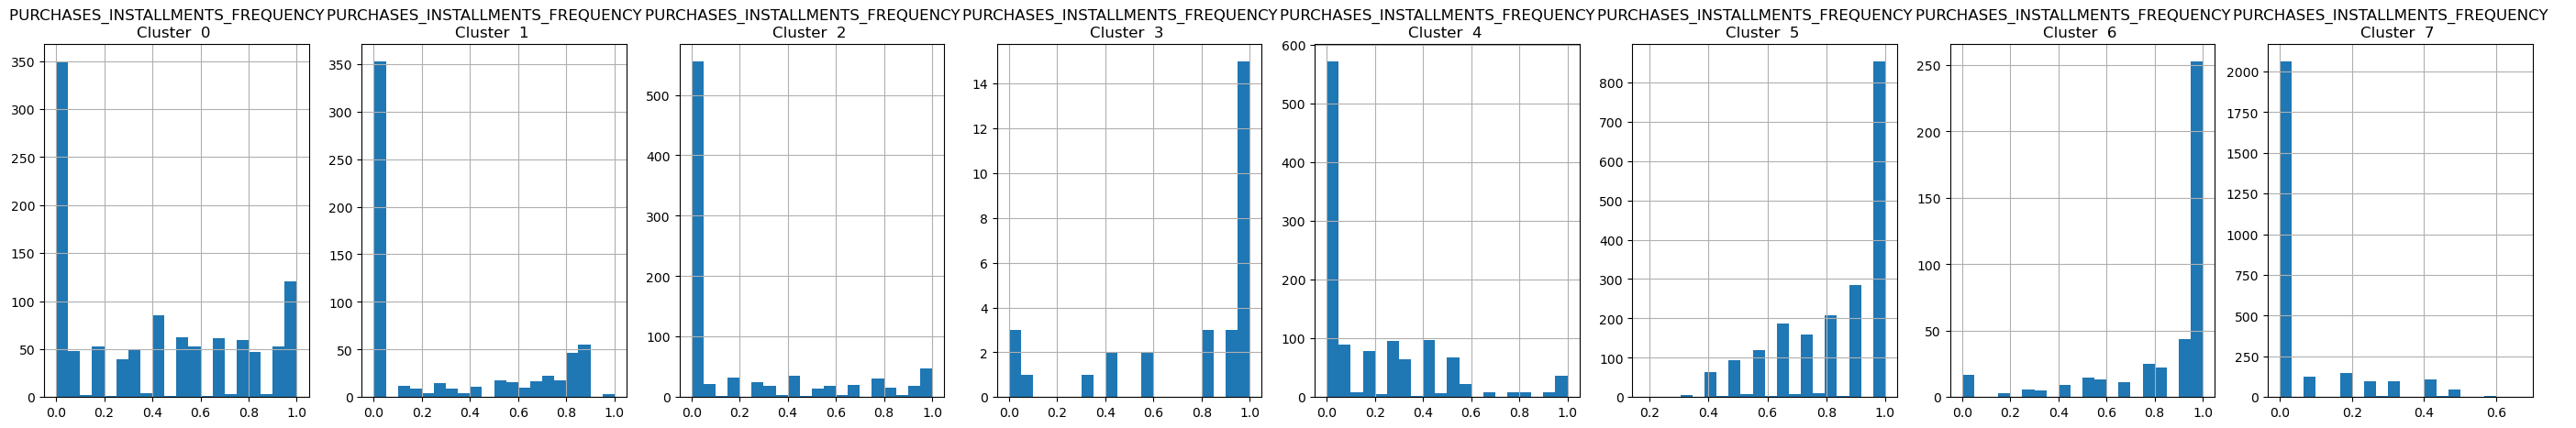

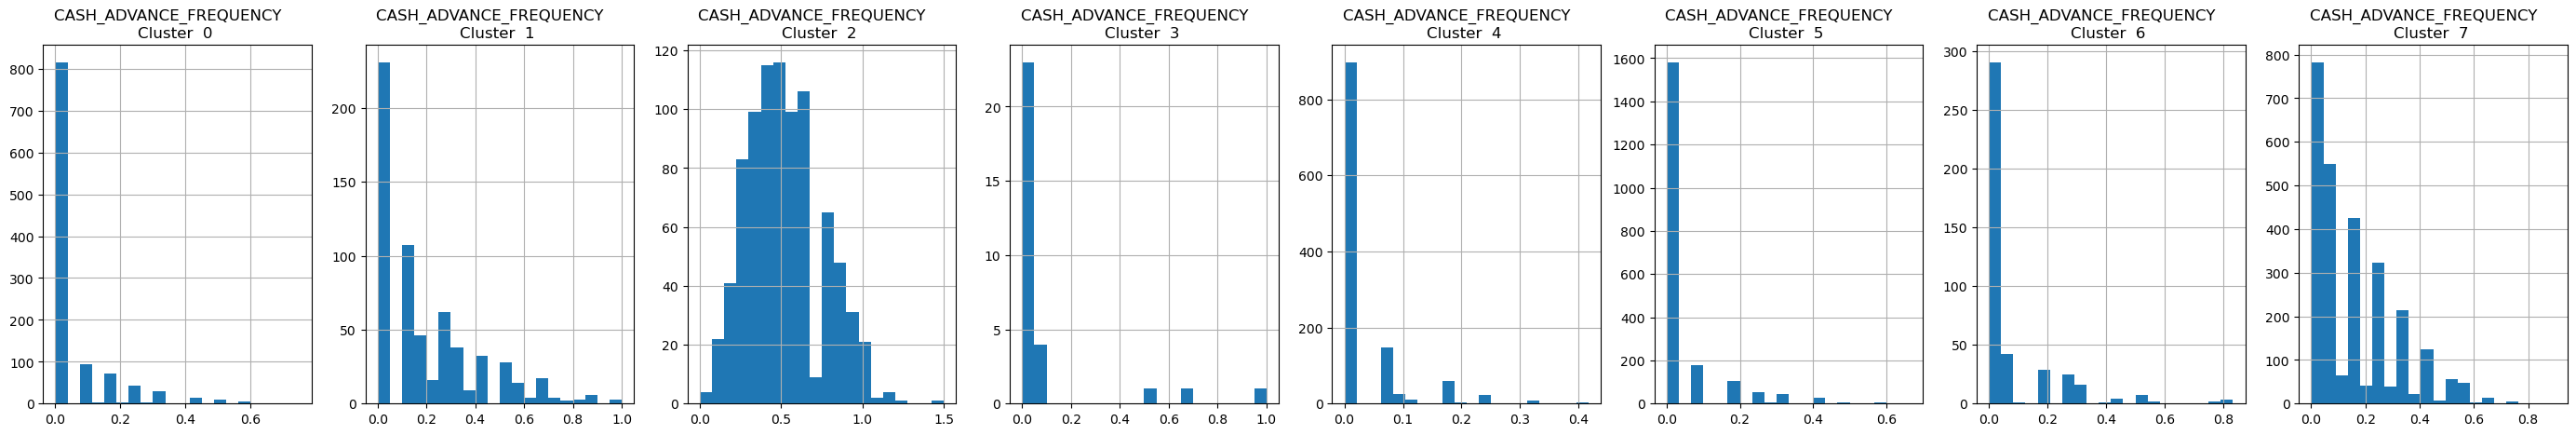

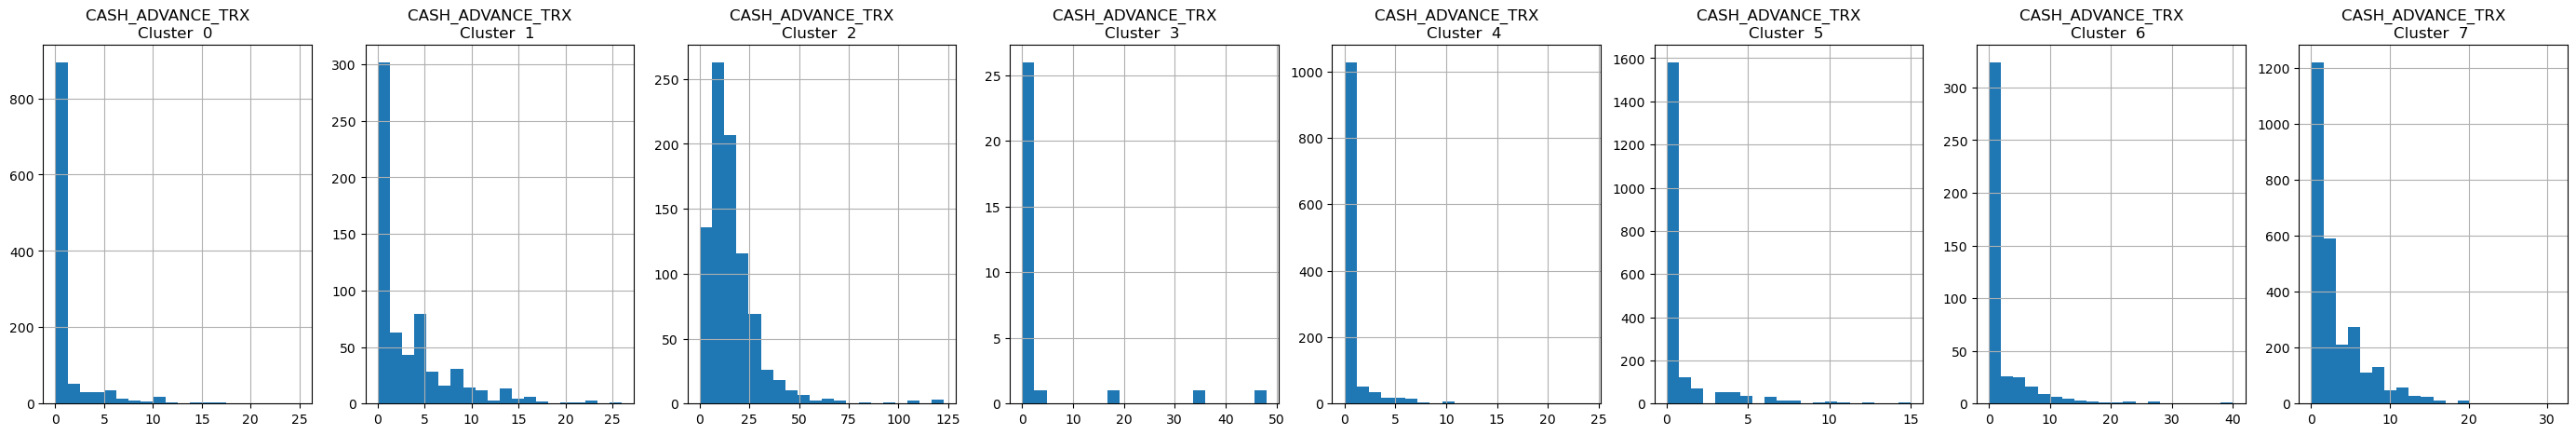

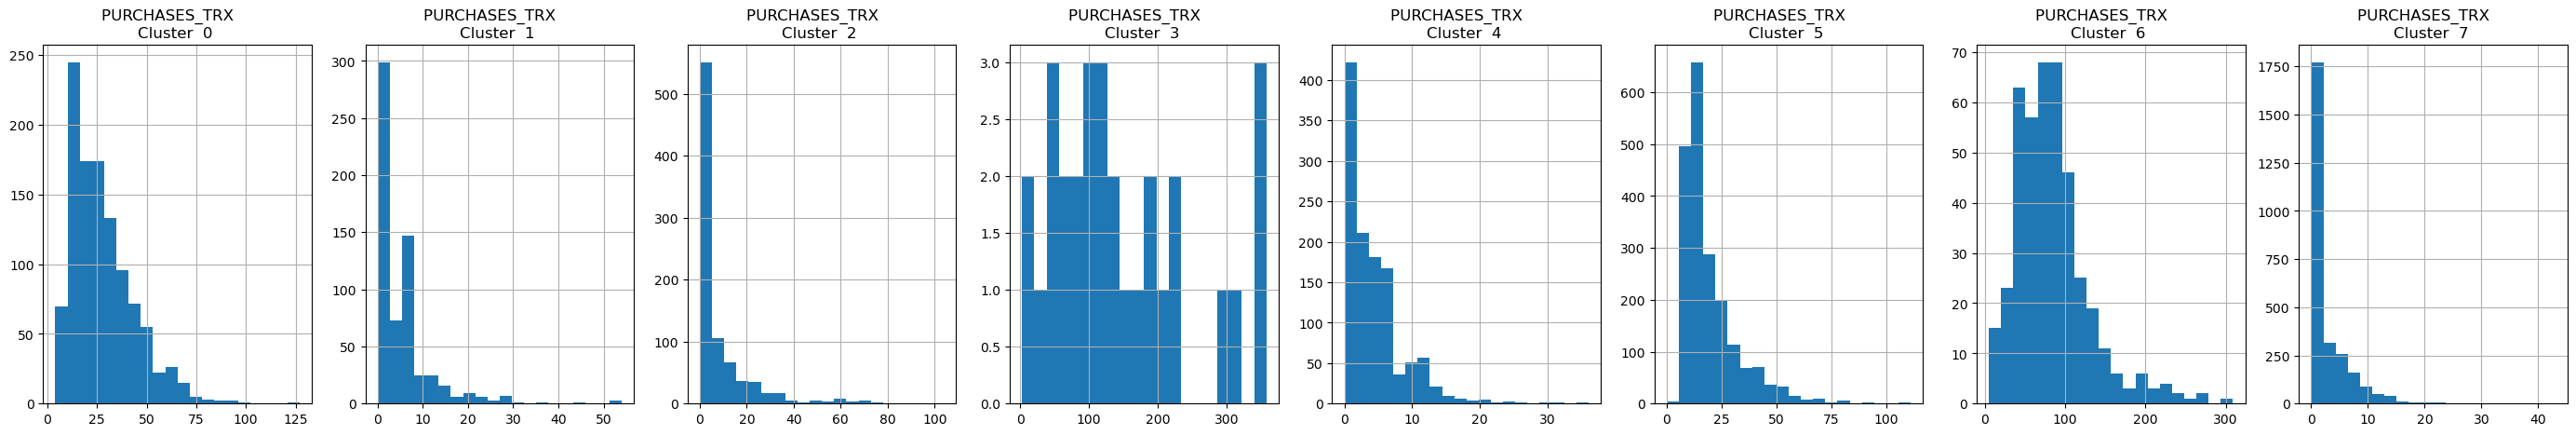

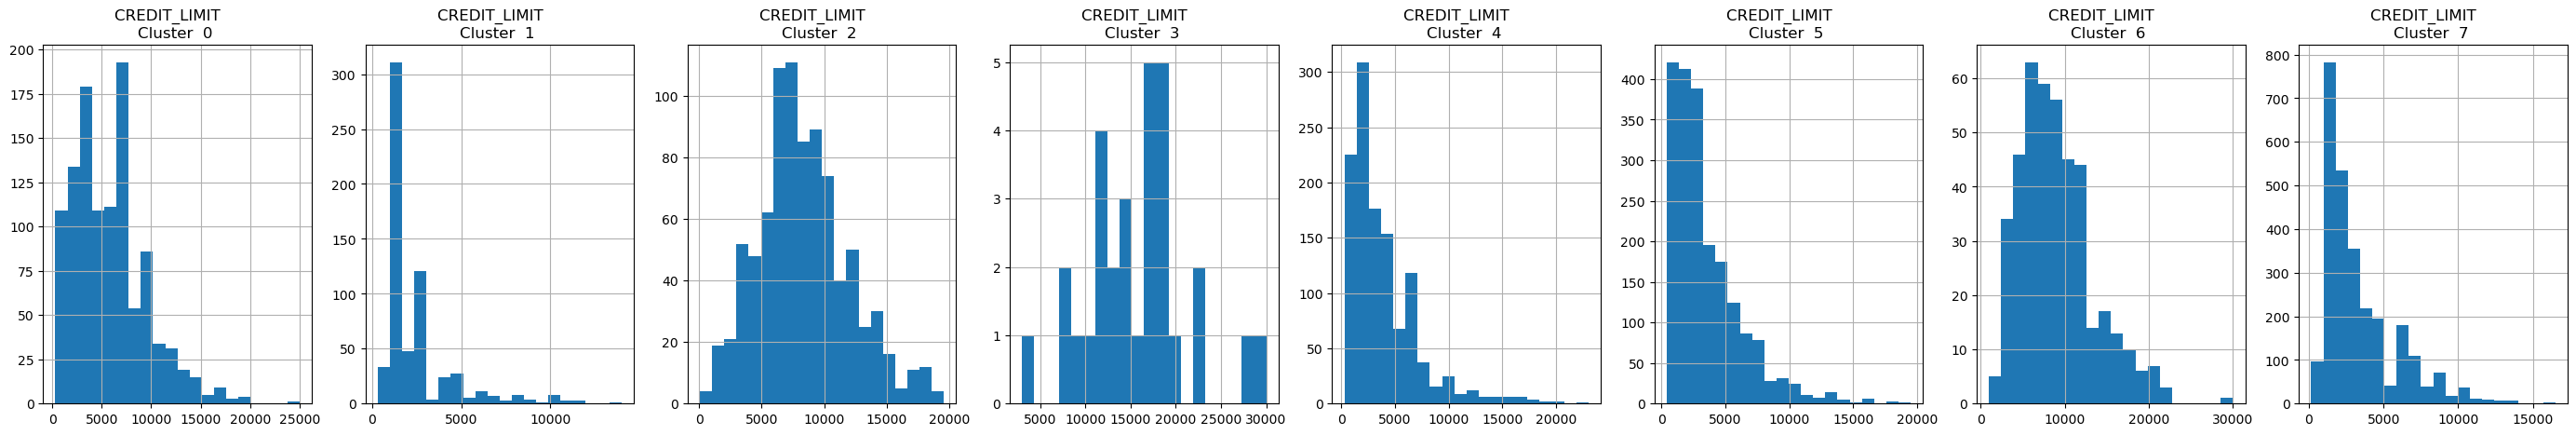

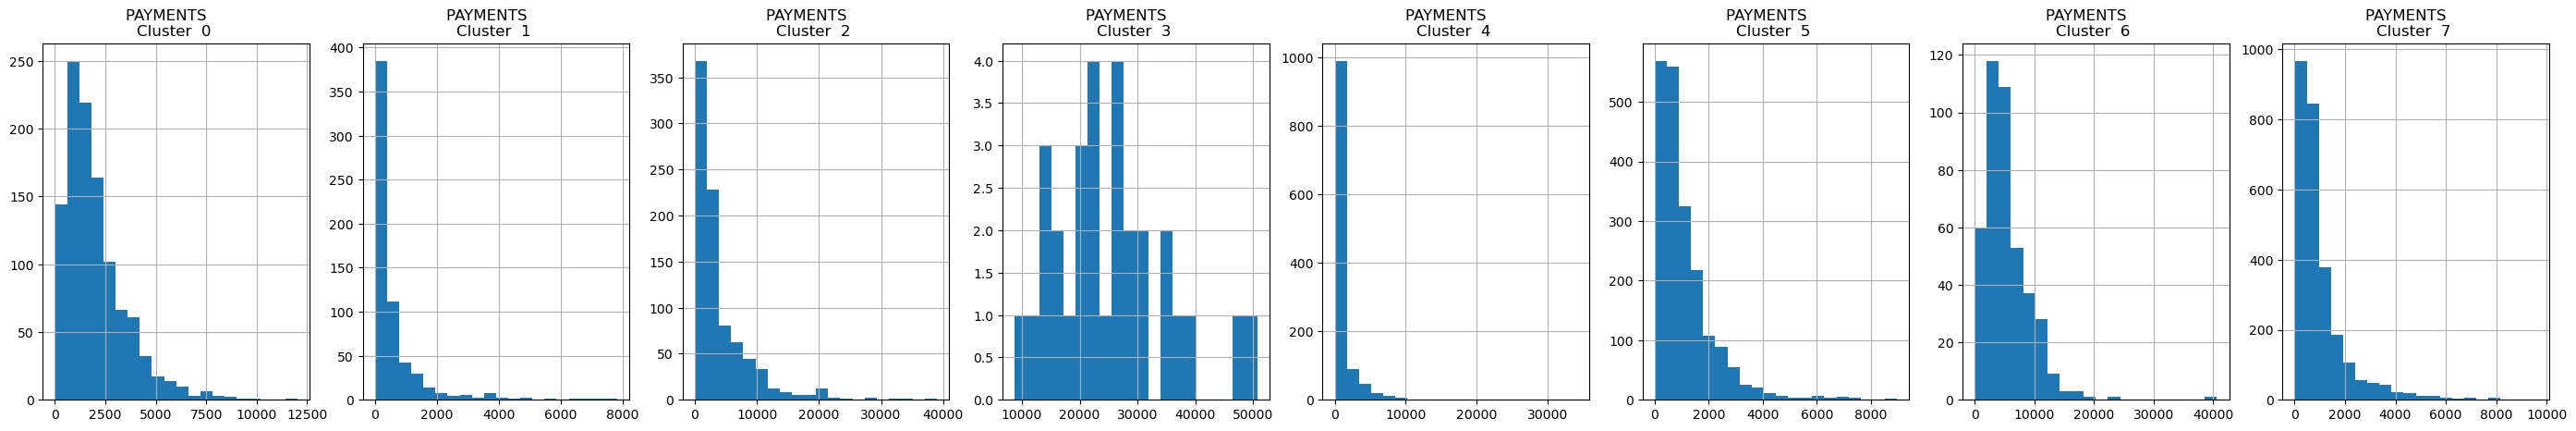

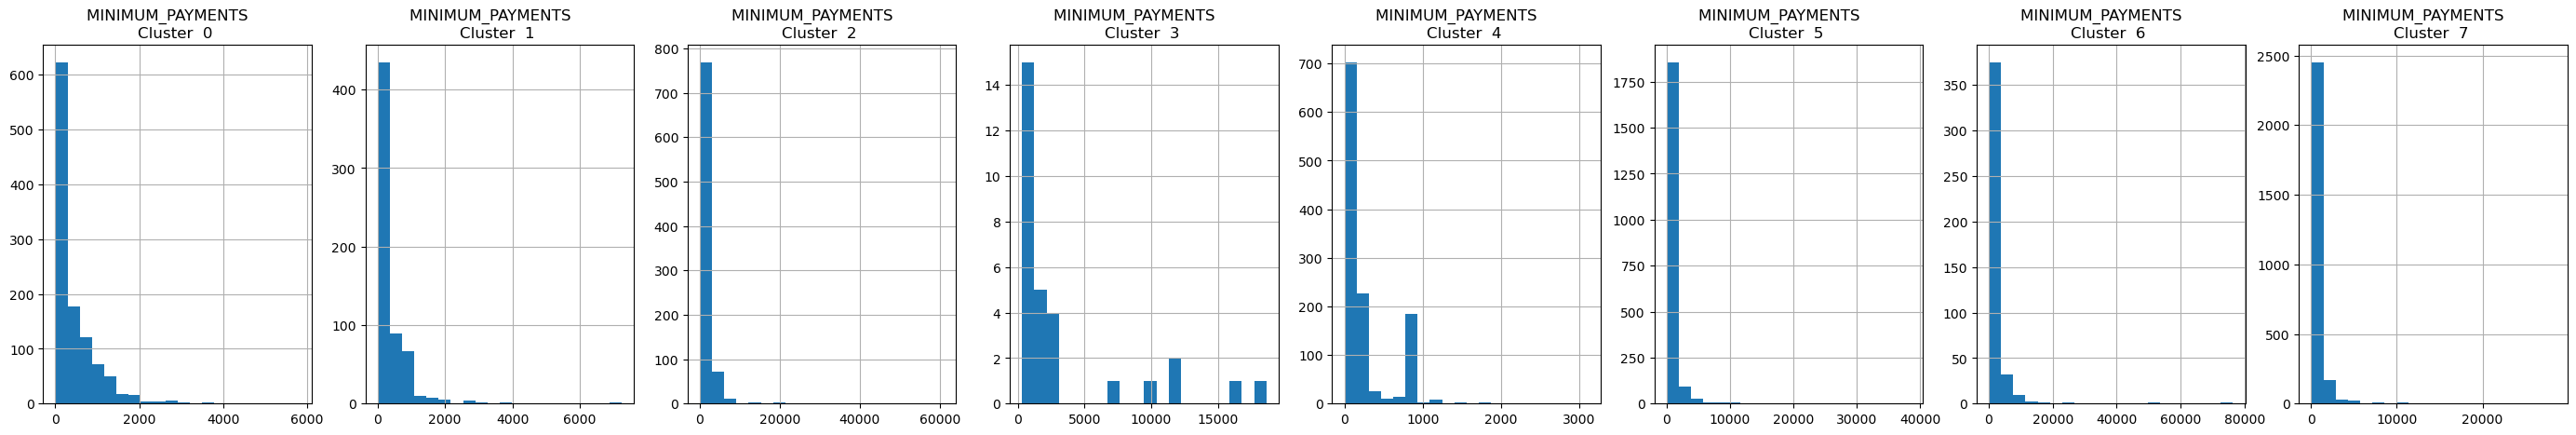

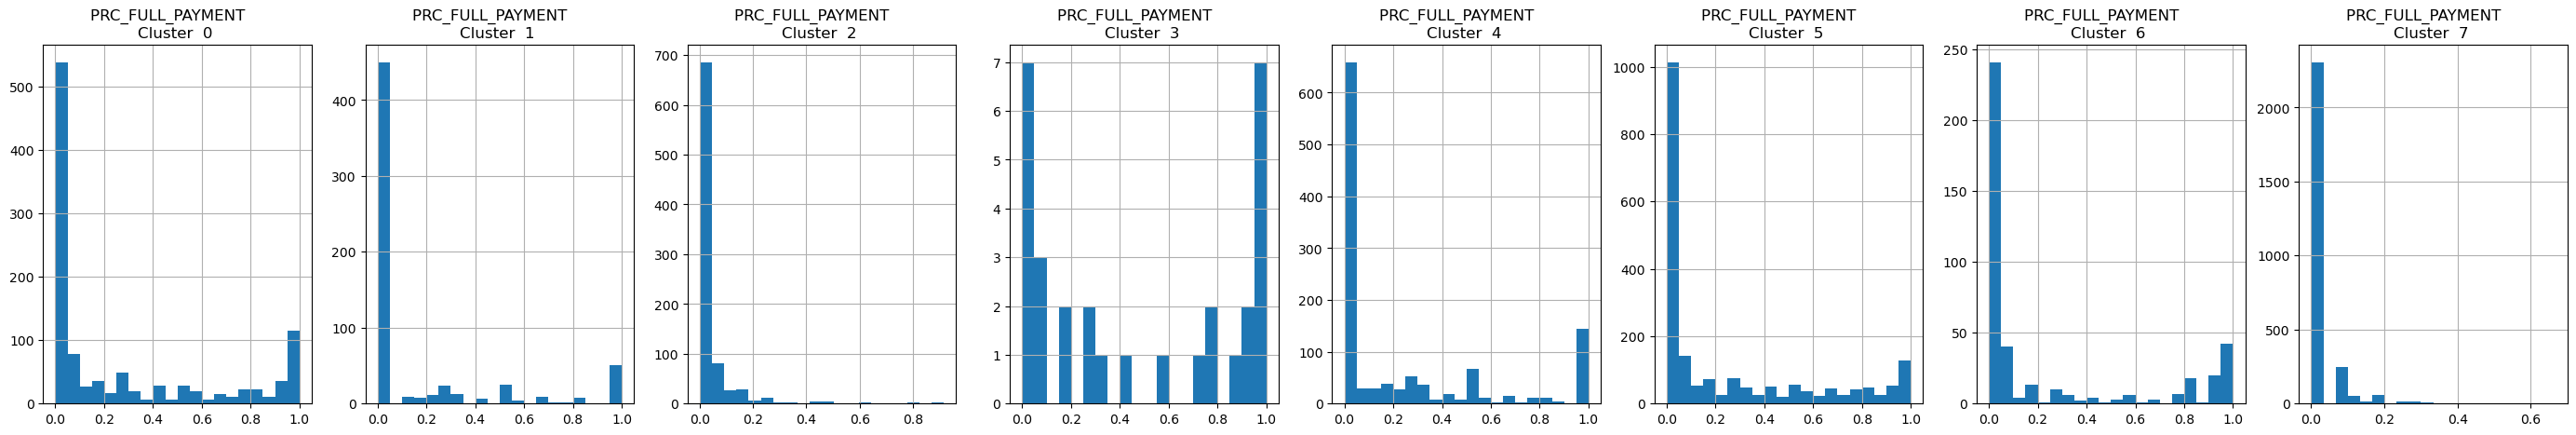

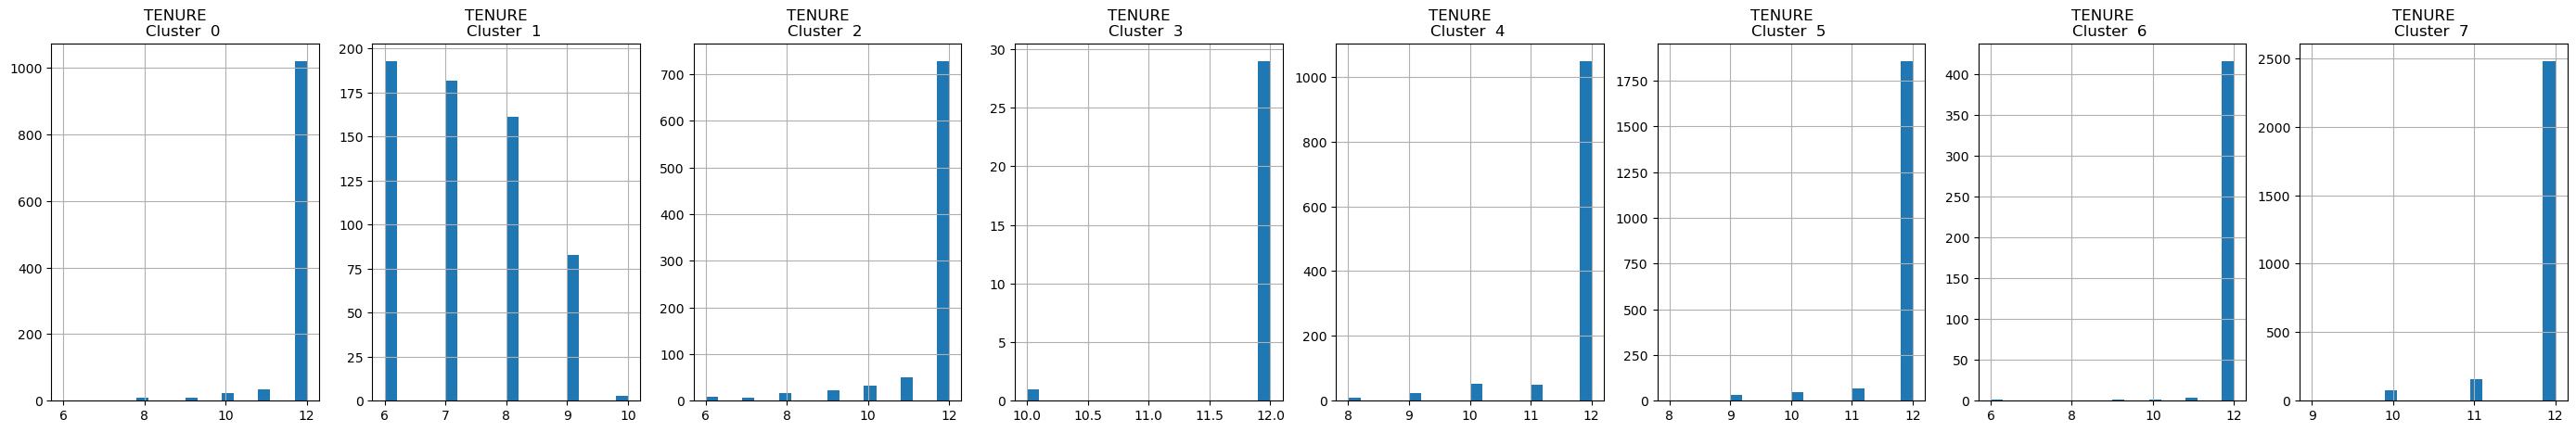

In [56]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster  {} '.format(i, j))

    plt.show()

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [57]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68225922, -1.0763016 ],
       [-1.13811014,  2.50661078],
       [ 0.96974633, -0.3835443 ],
       ...,
       [-0.92638992, -1.81086004],
       [-2.33669663, -0.65795373],
       [-0.55658391, -0.40060873]])

In [58]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682259,-1.076302
1,-1.138110,2.506611
2,0.969746,-0.383544
3,-0.873563,0.043202
4,-1.599443,-0.688413


In [59]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682259,-1.076302,7
1,-1.138110,2.506611,2
2,0.969746,-0.383544,0
3,-0.873563,0.043202,7
4,-1.599443,-0.688413,7


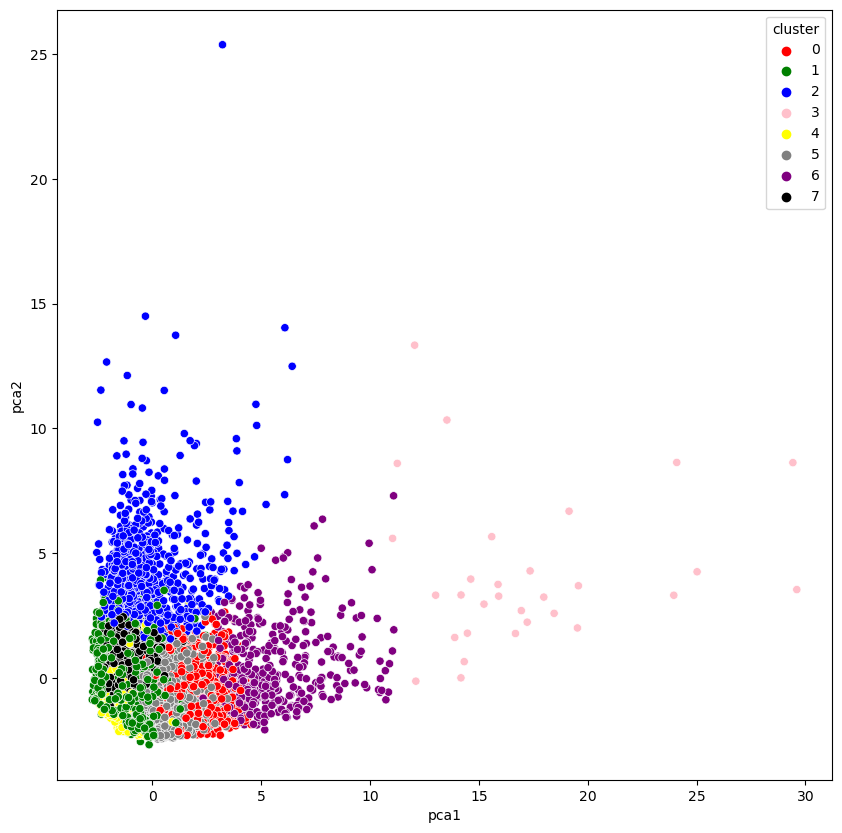

In [60]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [61]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [62]:
creditcard_df_scaled.shape

(8950, 17)

In [63]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6977
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3227
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2499
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1888
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1656
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1384
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1423
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1253
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1260
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1118
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1110
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1007
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0911
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0882
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0832
Epoc

In [65]:
autoencoder.save_weights('autoencoder.weights.h5')

In [66]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


In [67]:
pred.shape

(8950, 10)

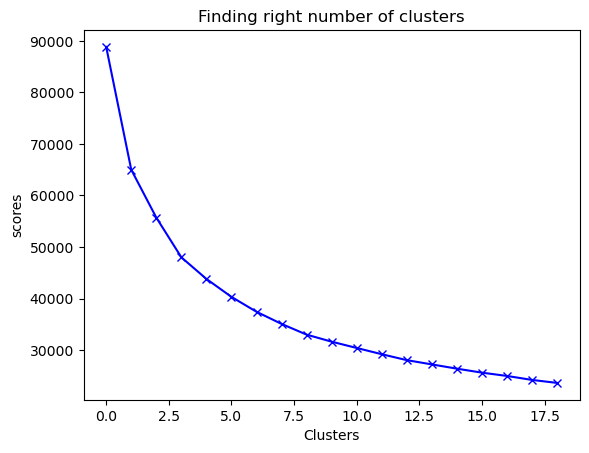

In [68]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15092\3067751309.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15092\3067751309.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


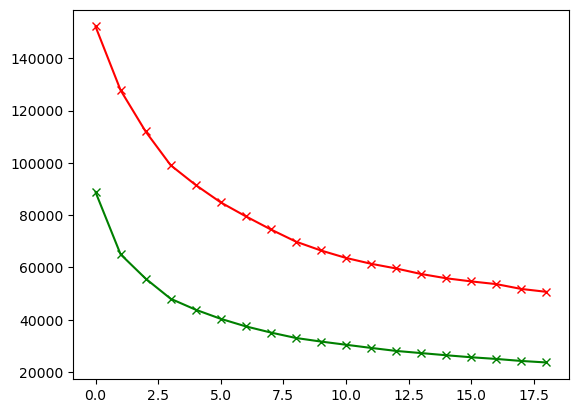

In [69]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [70]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [71]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [72]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.943030,-0.130328
1,0.622049,1.800509
2,1.182702,-0.334240
3,-1.084985,-0.175120
4,-1.426289,0.156372


In [73]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.943030,-0.130328,3
1,0.622049,1.800509,1
2,1.182702,-0.334240,0
3,-1.084985,-0.175120,3
4,-1.426289,0.156372,3


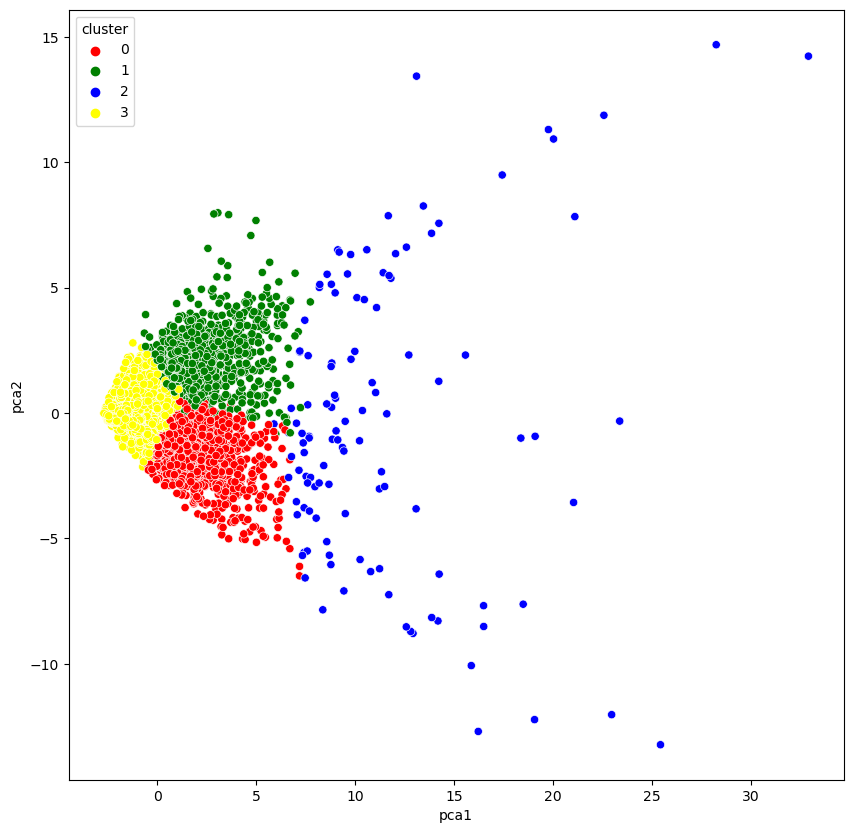

In [74]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()